Alessandro Beccani 931651
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 3</span>


By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ via Monte Carlo the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

When holding an asset, its value grows over time from $t = 0$ to $t = T$ by a factor of $F = e^{rT}$, where $r$ is the interest rate. The holder of a call option will exercise their right if the asset price at time $T$ is higher than the strike price $K$. Therefore, after sampling $S(T)$, the price of the call option is given by:
$$Call= F⋅max⁡(0,S(T)−K)$$

$$Call = F⋅max(0,S(T)−K)$$

where $S(T)$ is the asset price at maturity, and $K$ is the strike price of the option.

For a put option, the situation is analogous, with the payoff being:
$$Put =F⋅max⁡(0,K−S(T))$$

$$Put =F⋅max(0,K−S(T))$$

In both cases, $F = e^{-rT}$ accounts for the discount factor that adjusts the future payoff to its present value.

We compute the formula by sampling directly the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$

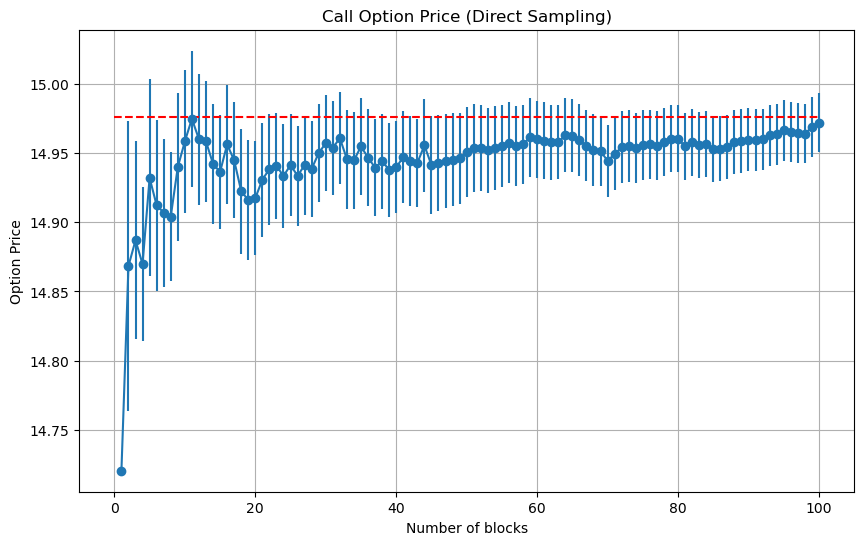

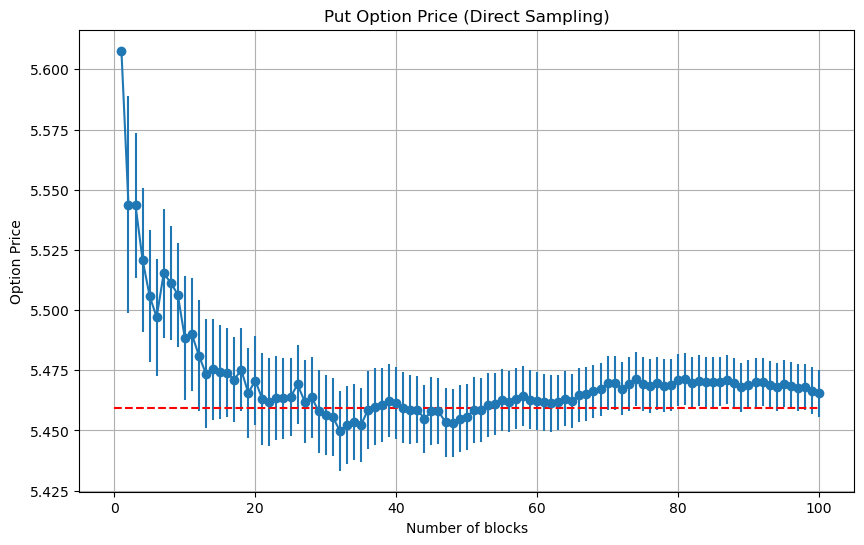

In [1]:
import matplotlib.pyplot as plt
import numpy as np

CALL = 14.975790778311286
PUT = 5.4595325819072364

def plot_data(filename, expected, title, ylabel):
    blocks, avg, sigma = np.loadtxt(filename, unpack = True)
    plt.figure(figsize=(10, 6))
    plt.errorbar(blocks, avg, yerr=sigma, fmt='o-', label='Average with uncertainty')
    plt.hlines(expected, 0, len(avg), colors='r', linestyles='dashed')
    plt.xlabel('Number of blocks')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Read and plot call options (direct sampling)
plot_data( './OUTPUT/BS_call_direct.dat',CALL, 'Call Option Price (Direct Sampling)', 'Option Price')

# Read and plot put options (direct sampling)
plot_data( './OUTPUT/BS_put_direct.dat',PUT, 'Put Option Price (Direct Sampling)', 'Option Price')

And by sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

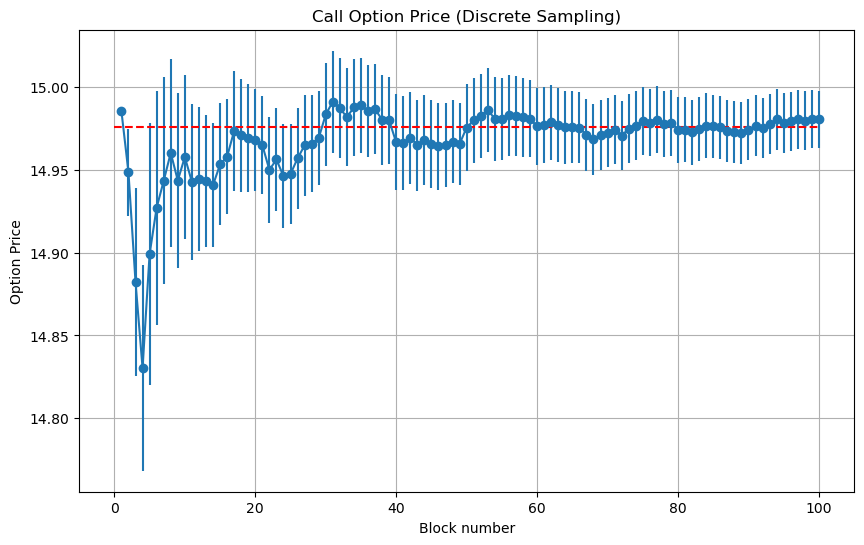

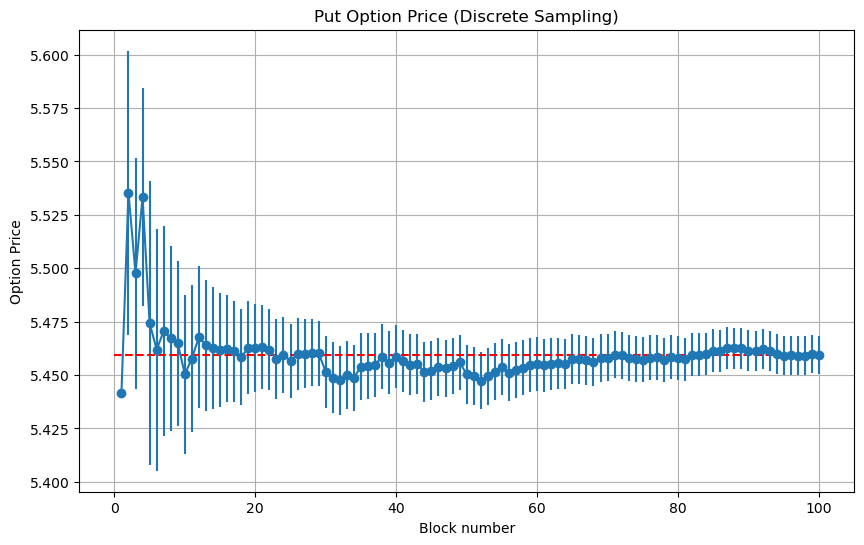

In [7]:
# Read and plot call options ( sampling)
plot_data( './OUTPUT/BS_call_discrete.dat',CALL, 'Call Option Price (Discrete Sampling)', 'Option Price')

# Read and plot put options (discretized sampling)
plot_data( './OUTPUT/BS_put_discrete.dat',PUT, 'Put Option Price (Discrete Sampling)', 'Option Price')

The expected values were calculated from the Black-Scholes analytic solutions. Both direct and discrete sampling methods converge to the expected values for the Call and Put option prices.